<a href="https://colab.research.google.com/github/Kuldip-Rajput/Capstone-project-Bike-sharing-demand-prediction/blob/main/Capstone_Project_Bike_Sharing_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -**Kuldip Kailas Rajput
##### **Team Member 2 -**Omprakash Mohan Nikam
##### **Team Member 3 -**Devendra Shivadas Shemale
##### **Team Member 4 -**Hitendra Shantaram Bhamare

# **Project Summary -**

Currently rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.



# **GitHub Link -**

https://github.com/Kuldip-Rajput/Capstone-project-Bike-sharing-demand-prediction

# **Problem Statement**


Currently rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import missingno as msno
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# machine learning
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/SeoulBikeData.csv',encoding= 'unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

Dataset contain 8760 observation and 14 features.

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

Their is no duplicate values in dataset.



#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

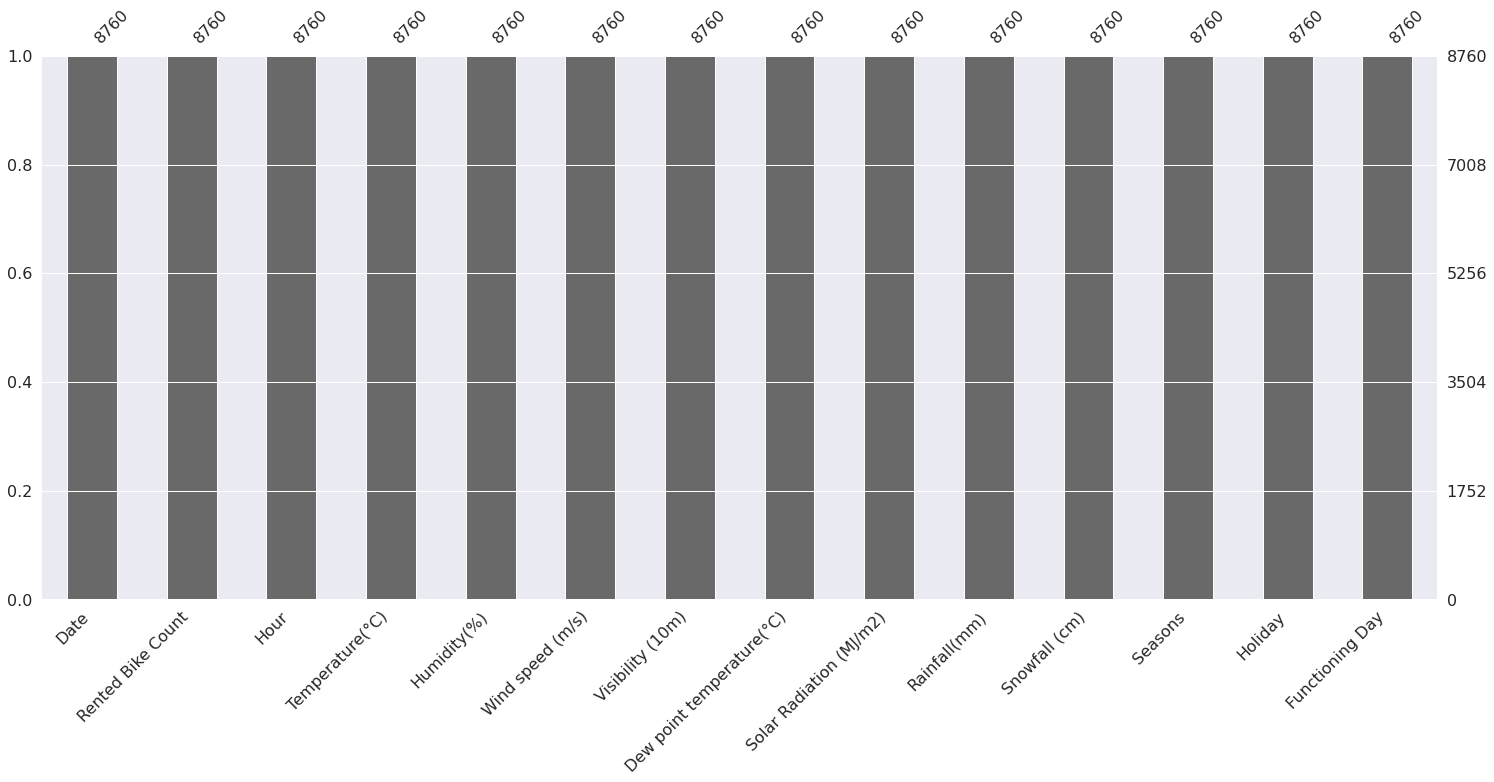

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting bar plot.
plt.figure(figsize=(5,5))
msno.bar(df)
plt.show()

Their is no null value present in dataset.

### What did you know about your dataset?

The given dataset is a dataset of Bike Sharing Demand, and we have to predict the Demand of the bike and the insights behind it.

The above dataset has 8760 rows and 14 columns. There are no missing values and duplicate values in the dataset.

dataset features are :

 Date, Rented Bike Count, Hour, Temperature(°C),Humidity(%)'
       Wind speed (m/s), Visibility (10m), Dew point temperature(°C),
       Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), Seasons\,
       Holiday, Functioning Day.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


### Variables Description 

Date - year-month-day 

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - amount of water vapor in the air

Windspeed - wind flow speed m/s

Visibility - the distance that you can see in particular light or weather conditions

Dew point temperature - temperature the air needs to be cooled 

Solar radiation - radiation emitted by the sun

Rainfall - amount of rain that falls

Snowfall - the amount of snow that falls

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
#1.date
print(df["Date"].unique())
print(df["Date"].nunique())

['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '12/02/2018' '13/02/2018'
 '14/02/20

In [ ]:
#3.Rented Bike Count
print(df["Rented Bike Count"].unique())
print(df["Rented Bike Count"].nunique())

[ 254  204  173 ... 1538  804  595]
2166


In [ ]:
#3.Hour
print(df["Hour"].unique())
print(df["Hour"].nunique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
24


In [ ]:
#4.Temperature(°C)
print(df["Temperature(°C)"].unique())
print(df["Temperature(°C)"].nunique())

[ -5.2  -5.5  -6.   -6.2  -6.4  -6.6  -7.4  -7.6  -6.5  -3.5  -0.5   1.7
   2.4   3.    2.1   1.2   0.8   0.6   0.   -0.3  -0.8  -0.9  -1.3  -1.8
  -2.2  -2.9  -3.8  -4.   -4.3  -4.4  -4.2  -0.4   1.9   4.3   6.    7.3
   7.6   6.4   5.5   5.    4.6   4.1   3.5   4.    3.9   3.3   3.4   3.1
   3.2   4.4   5.1   5.8   6.8   8.    6.7   5.7   5.2   4.7   4.2   3.6
   2.8   2.    0.2  -1.5  -1.1   0.1  -0.1  -0.2  -2.1  -3.6  -4.6  -5.3
  -5.8  -6.1  -6.8  -6.9  -7.2  -7.5  -8.1  -3.9  -2.3  -1.6  -0.7  -2.6
  -3.2  -3.7  -2.8  -2.5  -3.   -3.4  -3.3   1.6   5.3   1.1   1.3   1.4
   1.5   1.    0.3   2.3   3.7   0.7  -1.4  -2.7  -4.8  -7.   -6.7  -2.
  -1.7  -2.4  -3.1  -4.1  -4.7  -5.1  -5.4   2.5   0.4   0.5   0.9   5.4
  -1.   -5.6  -5.9  -7.1  -7.9  -8.6  -9.3  -9.7 -10.2 -10.7 -11.  -11.2
 -11.5 -11.6 -11.8 -12.1 -12.3 -10.5  -9.4  -8.3  -7.7  -8.2  -8.4  -8.8
  -9.   -9.5 -10.4 -10.9 -11.4 -11.9 -11.7 -11.1  -4.9  -4.5  -8.9  -9.2
  -9.8 -10.6 -10.8  -5.7  -6.3  -5.   -7.3  -8.   -8

In [ ]:

#4.Humidity(%)
print(df["Humidity(%)"].unique())
print(df["Humidity(%)"].nunique())

[37 38 39 40 36 35 27 24 21 23 25 26 54 58 66 77 79 81 83 84 87 86 82 68
 57 49 41 48 51 53 52 55 56 69 71 73 75 91 92 89 85 76 90 88 47 30 29 32
 43 45 44 42 34 33 31 28 46 59 78 70 64 60 94 93 96 65 50 74 63 61 72 62
 22 67 80 95 15 20 17 18 16 19 14 97 98 10 13 12 11  0]
90


In [ ]:
#5.Wind speed (m/s)
print(df["Wind speed (m/s)"].unique())
print(df["Wind speed (m/s)"].nunique())

[2.2 0.8 1.  0.9 2.3 1.5 1.3 1.1 0.5 1.2 1.4 1.6 2.  3.2 4.2 1.7 0.6 2.1
 2.5 1.8 2.6 1.9 2.7 3.7 3.4 3.5 4.5 4.1 4.8 5.4 5.8 4.7 5.3 3.9 3.  2.4
 2.8 0.  3.1 2.9 0.7 0.4 3.3 0.3 4.3 4.  3.8 3.6 5.1 4.6 0.1 5.  4.4 4.9
 0.2 6.7 6.  5.2 5.6 7.4 7.2 6.1 7.3 6.9 5.7]
65


In [ ]:
#6.Visibility (10m)
print(df["Visibility (10m)"].unique())
print(df["Visibility (10m)"].nunique())

[2000 1928 1996 ...  220  524 1688]
1789


In [ ]:
#7.Dew point temperature(°C)
print(df["Dew point temperature(°C)"].unique())
print(df["Dew point temperature(°C)"].nunique())

[-17.6 -17.7 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 -21.2 -20.2 -17.2 -15.6
 -14.6 -11.4  -7.   -6.5  -5.   -3.5  -3.6  -3.4  -4.2  -4.9  -6.2  -6.9
  -7.1  -7.3  -7.9  -7.8  -7.7  -4.8  -3.8  -3.3  -4.   -4.6  -4.1  -1.2
   0.   -1.3  -0.8  -0.1   1.2   1.7   2.    2.1   2.7   3.1   3.4   3.7
   3.6   3.8   3.3   3.2   2.6   2.4   2.3   1.3   1.1  -0.5  -2.5  -5.7
 -11.3 -13.  -12.1 -12.9 -15.5 -16.7 -17.8 -18.8 -18.3 -17.3 -15.8 -15.3
 -16.1 -16.9 -18.5 -20.4 -20.9 -20.6 -21.  -20.5 -21.8 -22.  -19.7 -18.2
 -16.  -15.1 -14.4 -13.5 -13.4 -13.3 -12.   -9.4  -6.1  -6.4  -7.2  -7.6
  -7.4  -6.8  -6.   -9.1 -10.3  -8.2  -2.9   0.2   0.3   0.1   0.5   0.4
  -0.7  -1.1  -1.4  -2.8  -2.2  -9.3 -10.1  -9.7  -9.6 -11.2 -12.2 -12.6
 -12.4 -13.1 -13.6 -15.4 -17.9 -19.1 -17.1 -16.6 -14.3 -13.2 -13.9 -13.8
 -12.8 -14.  -10.5  -9.8 -10.6 -11.   -8.3  -8.   -8.4  -8.1  -8.5  -3.7
  -1.9  -1.5  -1.6  -0.2   1.8  -2.3  -4.7  -8.6 -12.3 -14.5 -16.3 -17.4
 -16.8 -18.  -19.4 -17.5 -19.  -19.9 -19.2 -18.4 -2

In [ ]:
#8.Solar Radiation (MJ/m2)
print(df["Solar Radiation (MJ/m2)"].unique())
print(df["Solar Radiation (MJ/m2)"].nunique())

[0.   0.01 0.23 0.65 0.94 1.11 1.16 1.01 0.54 0.24 0.08 0.3  0.8  1.
 1.09 1.12 0.99 0.74 0.22 0.06 0.02 0.25 0.43 0.6  0.69 0.53 0.2  0.05
 0.64 1.17 0.88 0.55 0.18 0.21 0.63 0.93 1.08 1.1  0.96 0.72 0.36 0.1
 0.14 0.41 0.98 1.14 1.04 0.84 0.51 0.15 1.22 0.87 0.56 0.61 0.89 1.05
 1.13 1.06 0.4  0.03 0.28 0.35 0.62 1.26 1.24 0.92 0.58 0.19 1.23 0.13
 0.52 0.48 0.09 0.34 0.42 0.32 0.86 1.07 0.17 0.85 0.47 0.57 0.91 0.71
 0.12 0.67 0.77 0.78 0.16 0.66 0.38 0.11 0.04 0.07 1.18 0.9  0.33 0.75
 0.59 0.29 0.81 0.83 0.39 1.15 1.03 0.95 0.76 1.02 0.26 0.5  0.27 0.73
 0.46 0.31 1.2  1.19 0.45 0.49 0.79 0.44 0.68 1.27 1.25 1.21 0.7  1.28
 1.3  1.29 0.82 1.65 2.04 2.25 2.18 1.91 1.42 1.57 1.99 2.22 2.17 1.89
 1.4  1.73 2.12 2.29 2.23 1.94 1.44 1.72 2.09 2.3  2.24 1.93 1.56 1.97
 2.02 1.87 1.41 1.54 1.9  2.11 1.81 1.37 1.66 1.49 1.75 2.35 1.36 1.43
 2.08 1.55 2.28 2.19 1.96 1.34 1.68 1.84 1.45 1.7  2.01 2.2  1.33 2.46
 2.39 1.63 1.98 1.77 1.38 1.71 2.03 2.21 1.82 2.14 2.49 0.37 1.39 2.36
 1.95 2.5

In [ ]:
#9.Rainfall(mm)
print(df["Rainfall(mm)"].unique())
print(df["Rainfall(mm)"].nunique())

[ 0.   0.5  1.   2.5  0.1  0.2  0.3  0.7  1.6  0.4  1.1  6.4  9.5  3.5
  0.9  3.3  1.4  1.5  3.7  4.5  9.   2.   8.  17.   7.   3.   1.9  0.8
  4.   6.   5.   5.5  2.4 35.  19.  13.5 10.  12.5 11.5  5.4 10.5  6.5
 16.  14.5  4.9 21.5 12.  18.5  7.5 24.   8.5  7.3  1.3 15.5 29.5 21.
 13.   1.2 18.   9.1  1.8]
61


In [ ]:
#10.Snowfall (cm)
print(df["Snowfall (cm)"].unique())
print(df["Snowfall (cm)"].nunique())

[0.  0.1 0.3 0.4 0.2 1.  0.9 0.8 0.7 0.6 2.7 4.  4.1 4.3 3.9 3.1 2.1 1.4
 0.5 1.3 1.8 2.  4.8 5.1 5.  4.2 3.2 2.6 2.5 2.3 2.2 1.9 1.7 1.6 2.4 1.2
 1.1 3.  3.3 3.5 3.4 2.8 1.5 3.8 3.7 7.1 8.8 7.  6.  3.6 2.9]
51


In [ ]:
#11.Seasons
print(df["Seasons"].unique())
print(df["Seasons"].nunique())

['Winter' 'Spring' 'Summer' 'Autumn']
4


In [ ]:
#12.Holiday
print(df["Holiday"].unique())
print(df["Holiday"].nunique())

['No Holiday' 'Holiday']
2


In [ ]:
#13.Functioning Day
print(df["Functioning Day"].unique())
print(df["Functioning Day"].nunique())

['Yes' 'No']
2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to data.
data=df.copy()

In [ ]:
# converting dtype of date column
def get_date(date_str):
  date_obj= dt.datetime.strptime(date_str, '%d/%m/%Y')
  date_obj= pd.to_datetime(date_obj.date(), format="%Y-%m-%d")
  return date_obj

In [ ]:
#Apply the function.
data['Date'] = data['Date'].apply(get_date)

In [ ]:
# extracting date, month and day of week
data['year'] = data['Date'].apply(lambda x : x.year)
data['day'] = data['Date'].apply(lambda x : x.day)
data['month'] = data['Date'].apply(lambda x : x.month)
data['name_of_day'] = data['Date'].dt.day_name()



In [ ]:
#Drop the orignal column.
data= data.drop("Date", axis= 1)

In [ ]:
# Check new variables in dataset.
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,day,month,name_of_day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Friday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Friday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Friday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Friday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Friday


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7febcb128be0>],
      dtype=object)

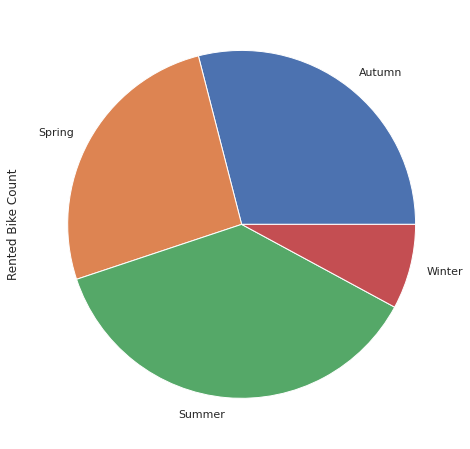

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10,8))
sns.set(style = 'dark')
data_seasons = data.groupby('Seasons').sum()
data_seasons['Rented Bike Count'].plot(kind='pie', subplots=True, figsize=(8, 8))


##### 1. Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole. True to the name, this kind of visualization uses a circle to represent the whole, and slices of that circle, or “pie”, to represent the specific categories that compose the whole.


##### 2. What is/are the insight(s) found from the chart?

1.Their is less Rented Bike Count in winter season.

2.More demand in summer.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 2

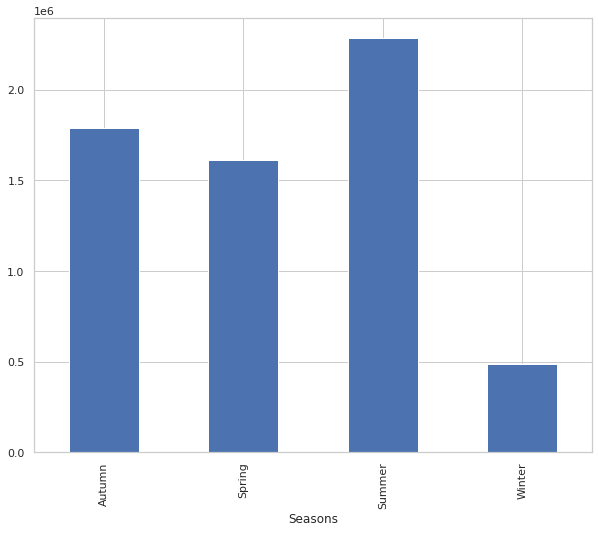

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10,8))
sns.set(style = 'whitegrid')
season_bike_count = df.groupby('Seasons').sum()['Rented Bike Count']
season_bike_count.plot(kind = 'bar')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.


##### 2. What is/are the insight(s) found from the chart?

In summer season highest bike demand may be holidays to kids or vacations of the adults.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 3

Text(0.5, 1.0, 'Count of Rented bikes acording to hour')

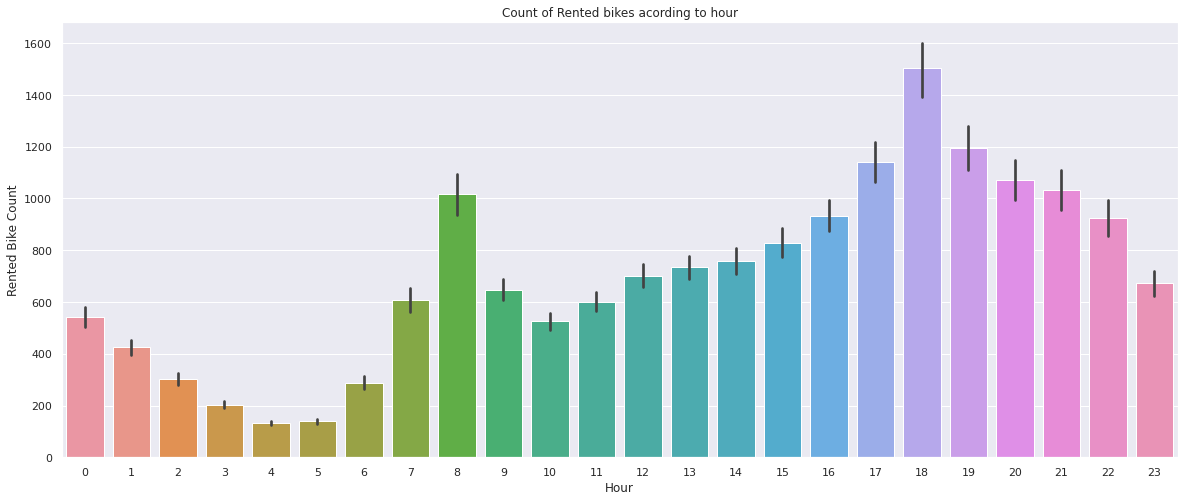

In [ ]:
#Counts in each hour
fig = plt.subplots(figsize = (20,8))
sns.barplot(data = data, x = 'Hour' , y = 'Rented Bike Count' )
plt.title('Count of Rented bikes acording to hour')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes bar charts show other statistics such as percentages.


##### 2. What is/are the insight(s) found from the chart?

- According to the above point plot and bar plot the demand for the bike is higher on weekdays, which are represented in blue, due to the office.
- Peak times are from 7 am to 9 am and from 5 pm to 7 pm.
- The blue colour represents the weekend days and it shows that the demand for rented bikes is very low especially in the morning hours but in the evening hours start from 4 p.m. to 8 p.m. the demand slightly increases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 4

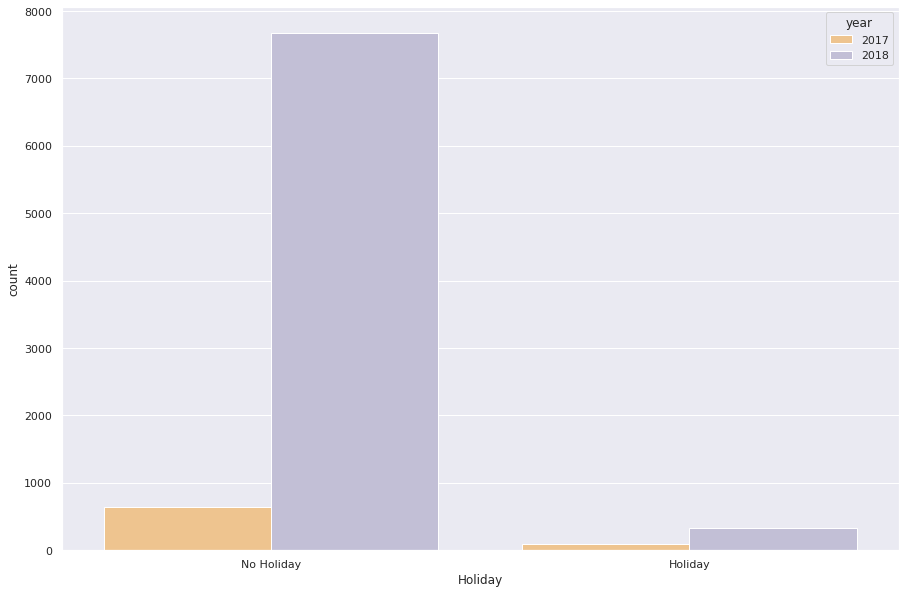

In [ ]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.countplot(x='Holiday',hue='year',data=data,palette = 'PuOr')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of true churn with respect to states, I have used Bar Chart.


##### 2. What is/are the insight(s) found from the chart?

The year 2018 has good year, because demand is very high compair to year 2017.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 5

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


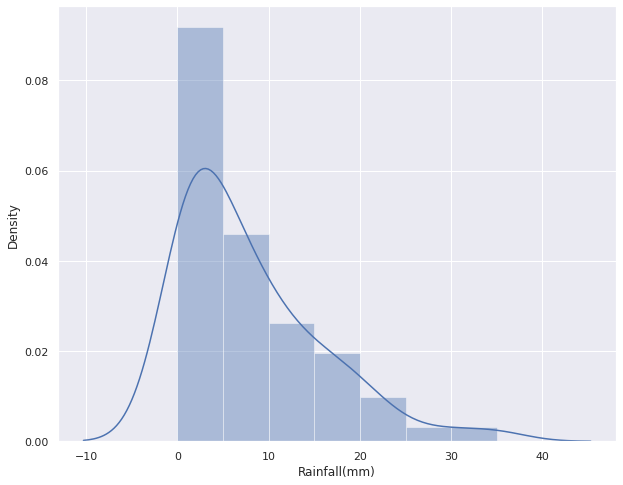

In [ ]:
data_rain = pd.DataFrame(data.groupby('Rainfall(mm)')['Rented Bike Count'].sum())
data_rain.reset_index(inplace=True)
plt.figure(figsize=(10,8))
sns.distplot(data_rain['Rainfall(mm)'])
plt.show()


##### 1. Why did you pick the specific chart?

Distplot show distrubtion with line chart .
A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables

##### 2. What is/are the insight(s) found from the chart?


People tend to rent bikes when there is no or less rainfall.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 6

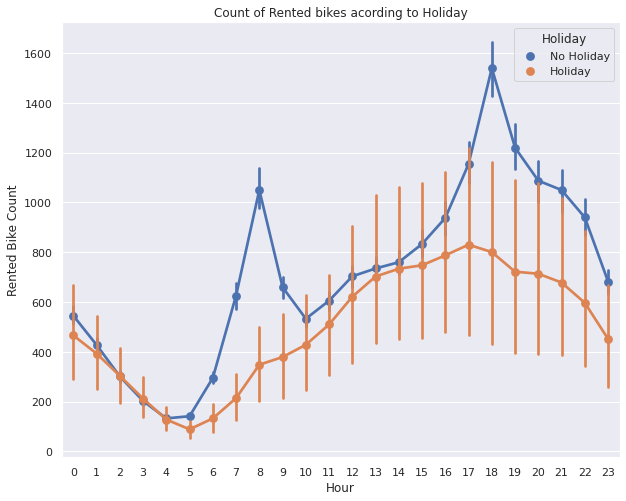

In [ ]:

#Counts trend in each hour during holidays and non-holidays
plt.figure(figsize=(10,8))
sns.pointplot(data=data,x='Hour',y='Rented Bike Count',hue='Holiday')
plt.title('Count of Rented bikes acording to Holiday')
plt.show()

##### 1. Why did you pick the specific chart?

A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.

##### 2. What is/are the insight(s) found from the chart?

The above bar and point plot, which depicts the use of a rented bike during four different seasons, clearly demonstrates that, During the summer, the most popular times to rent a bike are 7 a.m.-9 a.m. and 7 p.m.-5 p.m.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 7

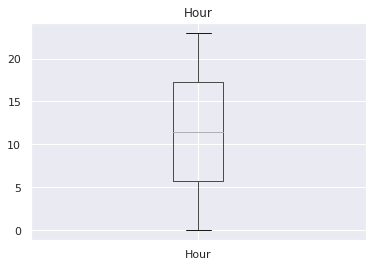

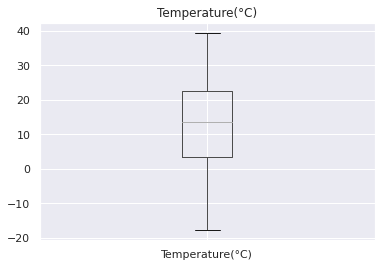

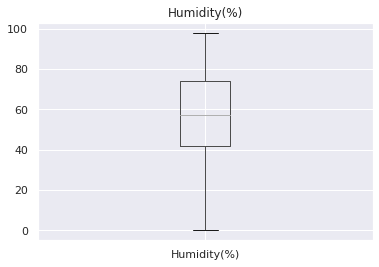

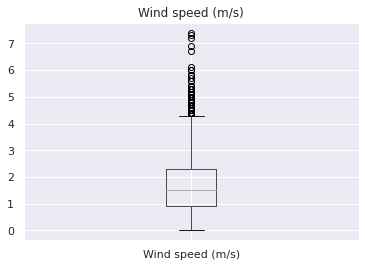

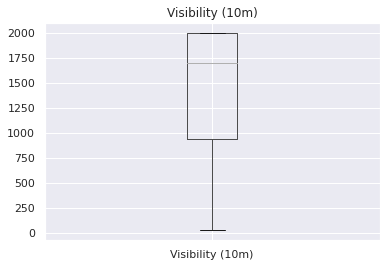

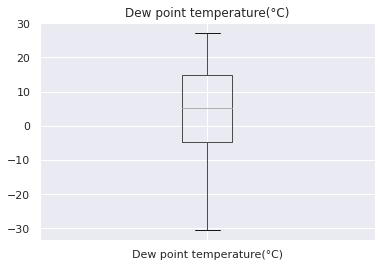

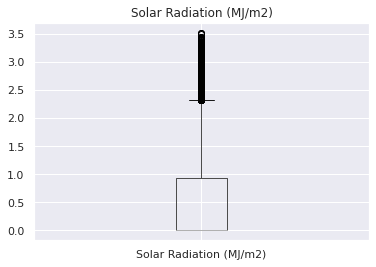

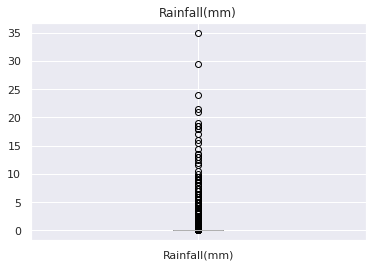

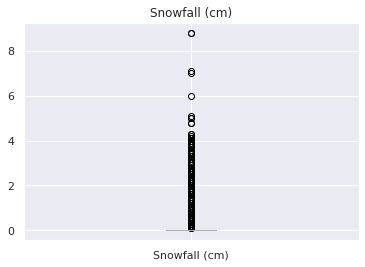

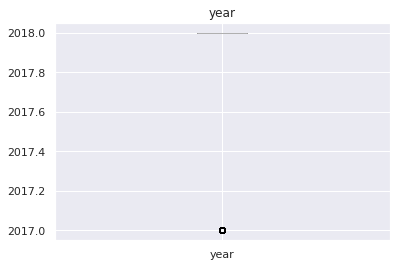

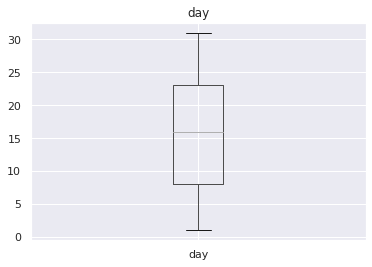

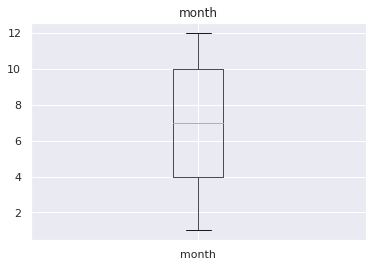

In [ ]:
# Chart - 7 visualization code
num_variables= list(data.describe().columns[1:])
for col in num_variables:
    fig = plt.figure()
    ax = fig.gca()
    data.boxplot(col, ax= ax)
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

To see the boxplot for each numerical features (checking outliers).
box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

To see the boxplot for each numerical features (checking outliers).

##### 2. What is/are the insight(s) found from the chart?

Variables such as wind speed (m/s), solar radiation (mj/m2), rainfall(mm), snowfall (cm) has outliers as seen in the boxplot.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

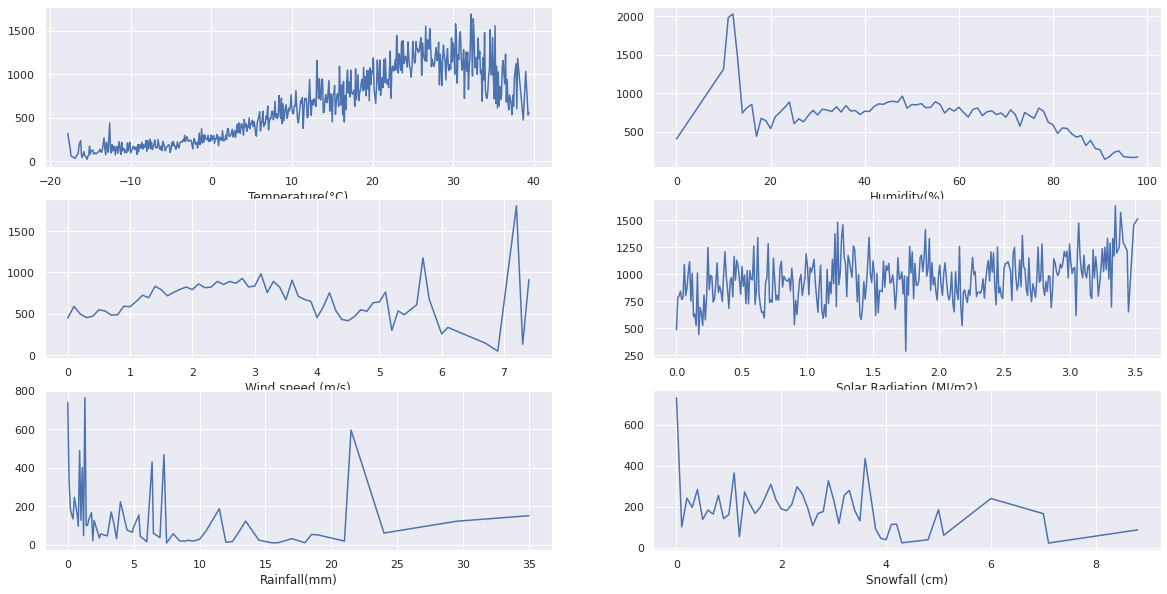

In [ ]:
# Chart - 8 visualization code
fig, ax = plt.subplots(3,2,figsize=(20,10))

data.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot(ax=ax[0][0])

data.groupby('Humidity(%)').mean()['Rented Bike Count'].plot(ax=ax[0][1])

data.groupby('Wind speed (m/s)').mean()['Rented Bike Count'].plot(ax=ax[1][0])

data.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot(ax=ax[1][1])

data.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot(ax=ax[2][0])

data.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot(ax=ax[2][1])

plt.show()

##### 1. Why did you pick the specific chart?

Line graphs are used to track changes over different periods of time. Line graphs can also be used as a tool for comparison

##### 2. What is/are the insight(s) found from the chart?

When the temperature is more the rental bike count is also high.

With increase in humidity the demand of rental bikes decreases.

Wind speed and solar radiation do not have much impact on the bike count.

When there is more than 10mm rainfall the demand of bike decreases but above 20mm of rain there is a huge peak. This could be the outlier or rainfall in the Summer.

With increase in snowfall there is a decrease in rented bike count.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

  Correlation Heatmap

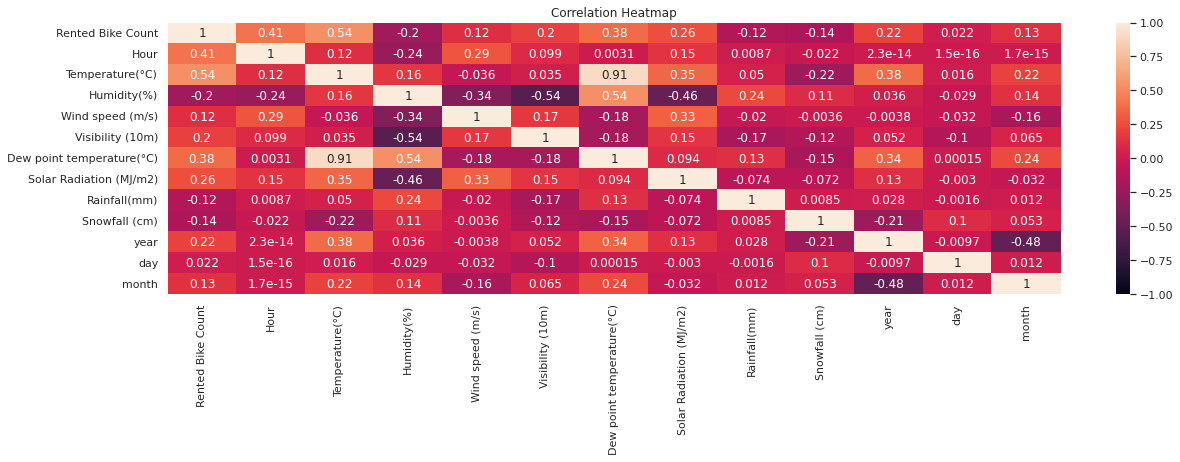

In [ ]:
# Correlation Heatmap visualization code

plt.figure(figsize=(20,5))
plt.title('Correlation Heatmap')
cor = sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap=None, annot=True )
plt.show()

##### 1. Why did you pick the specific chart?

Check for existence of corelation.

##### 2. What is/are the insight(s) found from the chart?

The most correlated features to the rented bike count are:

1.hour

2.temperature(°c)

3.dew point temperature(°c)

4.solar radiation (mj/m2)

There is a high correlation between dew point temperature(°c) and temperature(°c).

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
print(data.isnull().sum())


Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
year                         0
day                          0
month                        0
name_of_day                  0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [ ]:
df=data.copy()

In [ ]:
# Handling Outliers & Outlier treatments
#1. Rented Bike Count 
Q1 = df['Rented Bike Count'].quantile(0.25)
Q3 = df['Rented Bike Count'].quantile(0.75)
IQR = Q3 -Q1
#limits
upper_limit = Q3 +1.5*IQR
lower_limit = Q1 -1.5*IQR
#application
df['Rented Bike Count'] = np.where(
    df['Rented Bike Count'] > upper_limit,
    upper_limit,
    np.where(
        df['Rented Bike Count'] < lower_limit,
        lower_limit,
        df['Rented Bike Count']
    )
)

In [ ]:
#. Wind speed (m/s) 
Q1 = df['Wind speed (m/s)'].quantile(0.25)
Q3 = df['Wind speed (m/s)'].quantile(0.75)
IQR = Q3 -Q1
#limits
upper_limit = Q3 +1.5*IQR
lower_limit = Q1 -1.5*IQR
#application
df['Wind speed (m/s)'] = np.where(
    df['Wind speed (m/s)'] > upper_limit,
    upper_limit,
    np.where(
        df['Wind speed (m/s)'] < lower_limit,
        lower_limit,
        df['Wind speed (m/s)']
    )
)

In [ ]:
#3.Solar Radiation (MJ/m2)
Q1 = df['Solar Radiation (MJ/m2)'].quantile(0.25)
Q3 = df['Solar Radiation (MJ/m2)'].quantile(0.75)
IQR = Q3 -Q1
#limits
upper_limit = Q3 +1.5*IQR
lower_limit = Q1 -1.5*IQR
#application
df['Solar Radiation (MJ/m2)'] = np.where(
    df['Solar Radiation (MJ/m2)'] > upper_limit,
    upper_limit,
    np.where(
        df['Solar Radiation (MJ/m2)'] < lower_limit,
        lower_limit,
        df['Solar Radiation (MJ/m2)']
    )
)

In [ ]:
#4.Rainfall(mm)

Q1_re = df['Rainfall(mm)'].quantile(0.25)
Q3_re = df['Rainfall(mm)'].quantile(0.75)
IQR_re = Q3_re -Q1_re
#limits
upper_limit_re = Q3_re +1.5*IQR
lower_limit_re = Q1_re -1.5*IQR
#application
df['Rainfall(mm)'] = np.where(
    df['Rainfall(mm)'] > upper_limit_re,
    upper_limit_re,
    np.where(
        df['Rainfall(mm)'] < lower_limit_re,
        lower_limit_re,
        df['Rainfall(mm)']
    )
)

In [ ]:
#5.Snowfall (cm)
Q1_sn = df['Snowfall (cm)'].quantile(0.25)
Q3_sn = df['Snowfall (cm)'].quantile(0.75)
IQR_sn = Q3_sn -Q1_sn
#limits
upper_limit_sn = Q3_sn +1.5*IQR
lower_limit_sn = Q1_sn -1.5*IQR
#application
df['Rainfall(mm)'] = np.where(
    df['Rainfall(mm)'] > upper_limit_sn,
    upper_limit_sn,
    np.where(
        df['Rainfall(mm)'] < lower_limit_sn,
        lower_limit,
        df['Rainfall(mm)']
    )
)

##### What all outlier treatment techniques have you used and why did you use those techniques?

The interquartile range (IQR) contains the second and third quartiles, or the middle half of your data set. Whereas the range gives you the spread of the whole data set, the interquartile range gives you the range of the middle half of a data set. We remove the record below and above the 25% and 75% as a outlier.

### 3. Categorical Encoding

In [ ]:
# Label Encoding 

from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
#Application of label encoder.
df[['Seasons','Holiday','Functioning Day']] = df[['Seasons','Holiday','Functioning Day']].apply(label_en.fit_transform)

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# creating column of weekend or not
df['weekend']= df['name_of_day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)
df.drop('name_of_day', axis=1, inplace=True)

#### 2. Feature Selection

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Date']]])

,variables,VIF
0,Hour,4.471681
1,Temperature(°C),193.540865
2,Humidity(%),198.735173
3,Wind speed (m/s),5.132486
4,Visibility (10m),10.843661
5,Dew point temperature(°C),130.183897
6,Solar Radiation (MJ/m2),2.998808
7,Rainfall(mm),1.298812
8,Snowfall (cm),1.178040
9,Seasons,3.786085


We can see here that 'dew point temperature(°c)', 'temperature(°c)' and year have a high VIF value, meaning they can be predicted by other independent variables in the dataset.

Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features.

In [ ]:
# droping 'dew point temperature(°c)', 'year', 'day', 'month'
calc_vif(df[[i for i in num_variables if i not in ['Dew point temperature(°C)', 'day', 'month','year']]])

,variables,VIF
0,Hour,3.938346
1,Temperature(°C),3.215422
2,Humidity(%),5.210917
3,Wind speed (m/s),4.807816
4,Visibility (10m),4.899362
5,Solar Radiation (MJ/m2),2.321140
6,Rainfall(mm),1.219022
7,Snowfall (cm),1.120514



After droping 'dew point temperature(°c)', 'year', 'day' and 'month', VIF values for all features have decreased less than 5 that is good to build regression model.

In [ ]:
# droping 'dew point temperature(°c)', 'year', 'day', 'month' from original dataset
df= df.drop(['Dew point temperature(°C)', 'day', 'month'], axis=1)

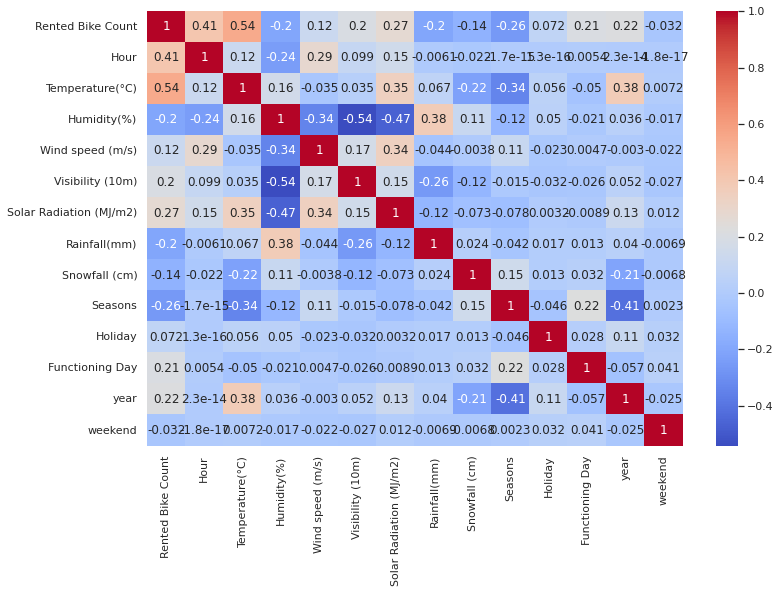

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap= 'coolwarm')

##### What all feature selection methods have you used  and why?

The Variance Inflation Factor (VIF) technique from the Feature Selection Techniques collection is not intended to improve the quality of the model, but to remove the autocorrelation of independent variables.

### 6. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Creating the data of independent variables
dependent_var= "Rented Bike Count"
Y = np.sqrt(df[dependent_var])

# Create the dependent variable data
X = df.drop(dependent_var, axis=1)

In [ ]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 11)

##### What data splitting ratio have you used and why? 

We  used ratio is 80:20, which means 80% of the data is for training and 20% for testing.The 80-20 rule prioritizes the 20% of factors that will produce the best results.The general point is that, in most cases, 80% of effects come from 20% of causes

## ***7. ML Model Implementation***

### ML Model - 1 Linear Regression

In [ ]:

# Create an instance of the Linear Regression
regression=LinearRegression()

# Fit the Algorithm
regression.fit(X_train,Y_train)
# Predict on the model
y_pred_train=regression.predict(X_train)
y_pred_test=regression.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
regression.coef_

array([ 4.98822219e-01,  5.40726252e-01, -1.12590415e-01,  1.97809882e-01,
        2.35525229e-04, -7.66233972e-01, -1.15583636e+01, -1.16528211e-01,
       -2.29563730e+00,  3.05307112e+00,  2.87131333e+01, -1.57359689e+00,
       -1.49851389e+00])

In [ ]:
# model score
regression.score(X_train, Y_train)

In [ ]:
#calculate Meam square error
MSE_lr= mean_squared_error((Y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate Root mean square error
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate Mean absolute error
MAE_lr= mean_absolute_error(Y_train, y_pred_train)
print("MAE :",MAE_lr)

#calculate r2 and adjusted r2
r2_lr= r2_score(Y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(Y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(Y_train
, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 47.00974442990058
RMSE : 6.856365249160854
MAE : 5.3071215923445685
R2 : 0.6893205969484972
Adjusted R2 : 0.6869967579153157


Looks like our r2 score value is 0.68 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
#calculate MSE
MSE_lr= mean_squared_error(Y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(Y_test, y_pred_test)
print("MAE :",MAE_lr)

#calculate r2 and adjusted r2
r2_lr= r2_score((Y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((Y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 49.01542648422509
RMSE : 7.001101805017914
MAE : 5.419992500430919
R2 : 0.6808373635811742
Adjusted R2 : 0.6784500711338527


The r2_score for the test set is 0.68. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

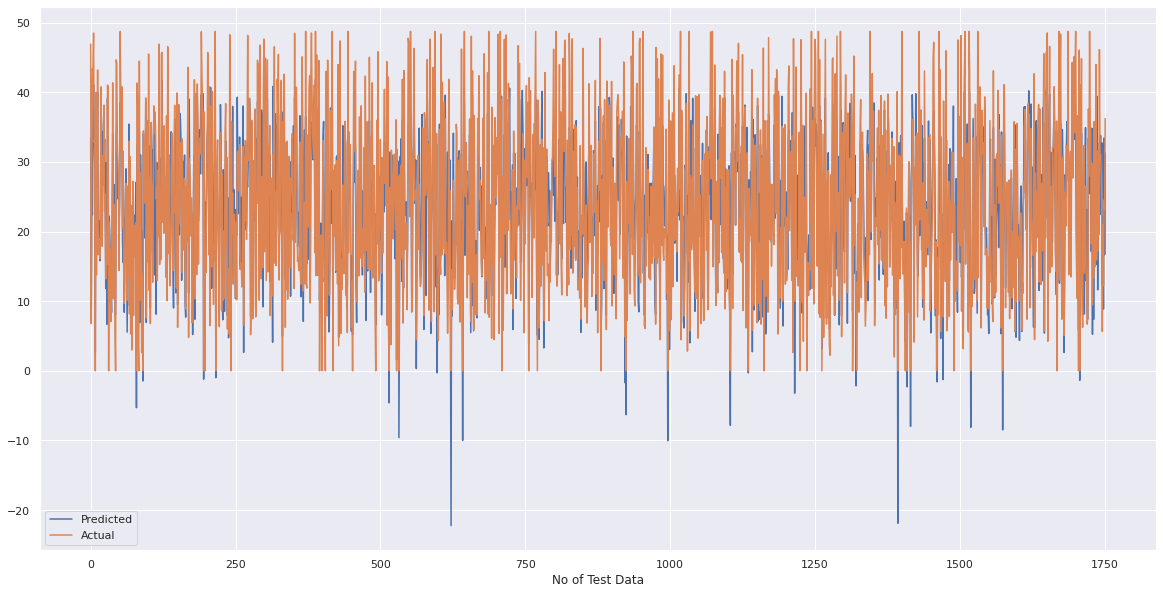

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(y_pred_test)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

### ML Model - 2 Lasso Regression

In [ ]:
# ML Model - 1 Implementation (Lasso)
# Create an instance of the Lasso Regression
lasso = Lasso(alpha = 0.1, max_iter = 2000)

# Fit the Algorithm
lasso.fit(X_train,Y_train)
# Predict on the model
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# FIinding out scores 
print(lasso.score(X_train,Y_train), lasso.score(X_test,Y_test))

0.682881608676386 0.671160983419467


In [ ]:
# Visualizing evaluation Metric Score chart
# for train
#calculate MSE
MSE_l= mean_squared_error((Y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(Y_train, y_pred_train_lasso)
print("MAE :",MAE_l)

#calculate r2 and adjusted r2
r2_l= r2_score(Y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(Y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(Y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 47.984045236732285
RMSE : 6.9270516987194695
MAE : 5.381582405555217
R2 : 0.682881608676386
Adjusted R2 : 0.6805096069000874


Looks like our r2 score value is 0.68 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#for test
#calculate MSE
MSE_l= mean_squared_error(Y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(Y_test, y_pred_test_lasso)
print("MAE :",MAE_l)

#calculate r2 and adjusted r2
r2_l= r2_score((Y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((Y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((Y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 50.501477313267564
RMSE : 7.106439144414561
MAE : 5.5237758399139505
R2 : 0.671160983419467
Adjusted R2 : 0.6687013129847449


Looks like our r2 score value is 0.67 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

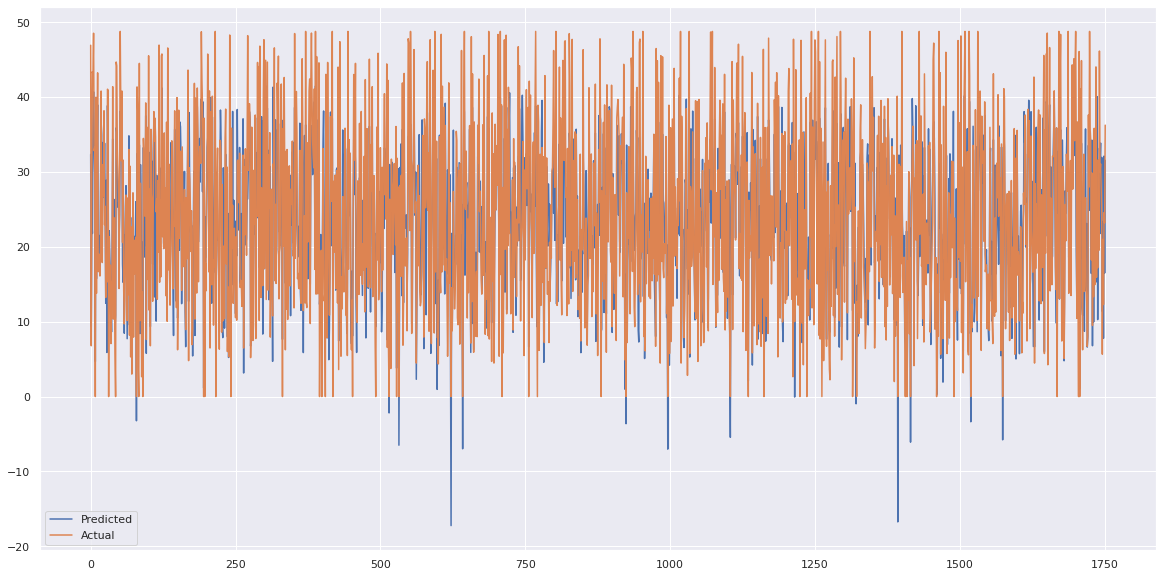

In [ ]:
#Plot the figure
plt.figure(figsize=(20,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
# Cross validation
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=5)
lasso_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.193e+05, tolerance: 8.433e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.277e+05, tolerance: 8.477e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.218e+05, tolerance: 8.545e+01

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 5, 10, 20, 30, 40, 45, 50, 55,
                                   60, 100]})

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  0.6872077921085419


In [ ]:
# predictions on train and test dataset
y_pred_lasso1 = lasso_regressor.predict(X_train)
y_pred_lasso2 = lasso_regressor.predict(X_test)

In [ ]:
# Test data evaluation metrics
#calculate MSE
MSE_l= mean_squared_error((Y_train), (y_pred_lasso1))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(Y_train, y_pred_lasso1)
print("MAE :",MAE_l)

#calculate r2 and adjusted r2
r2_l= r2_score(Y_train, y_pred_lasso1)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(Y_train, y_pred_lasso1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(Y_train, y_pred_lasso1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 47.00974442990061
RMSE : 6.856365249160856
MAE : 5.307121592344568
R2 : 0.689320596948497
Adjusted R2 : 0.6869967579153154


After Hyperparameter Tuning, we can see the value of r2 score for train data is coming as 0.68 which is very good as compared to the model without hyperparameter tuning and cross validation.

In [ ]:
#calculate MSE
MSE_l= mean_squared_error(Y_test, y_pred_lasso2)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(Y_test, y_pred_lasso2)
print("MAE :",MAE_l)

#calculate r2 and adjusted r2
r2_l= r2_score((Y_test), (y_pred_lasso2))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((Y_test), (y_pred_lasso2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((Y_test), (y_pred_lasso2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 49.01542648422505
RMSE : 7.001101805017911
MAE : 5.41999250043091
R2 : 0.6808373635811744
Adjusted R2 : 0.6784500711338529


The value of r2 score for test data is also showing good improvement after the application of hyperparameter tuning and hence we can say it's a good score and good model.

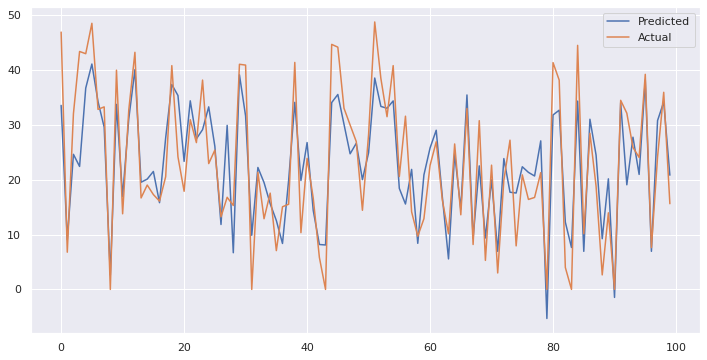

In [ ]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(y_pred_lasso2[:100])
plt.plot(np.array(Y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV.it used to find the optimal hyperparameters of a model which results in the most 'accurate' predictions.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is a littel of improvement after doing hyperparameter tuning and cross validation.



#### 3. Explain each evaluation metric's indication towards business and the business impact Of the ML model used.

1.The Mean Squared Error (MSE) : it is an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value. 
the lower the value the better and 0 means the model is perfect we got 784.83 after Cross Validation.

2.Root Mean Squared Error (RMSE) : is a square root of value gathered from the mean square error function. It helps us plot a difference between the estimate and actual value of a parameter of the model. Using RSME, we can easily measure the efficiency of the model.
The lower the RMSE, the better a given model is able to “fit” a dataset. we got 28.01 after CV.

3.R2 : is a measure of the goodness of fit of a model.after Cross validation we got 0.82 R2.

4.Adjusted R2:It is  a corrected goodness-of-fit (model accuracy) measure for linear models.In general, the higher the R-squared, the better the model fits your data.


### ML Model - 3 Elastic net Regression

In [ ]:
# ML Model - 3 Implementation
# Create an instance of the Elastic net Regression
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit the Algorithm
elasticnet.fit(X_train, Y_train)
# Predict on the model
y_pred_train_en = elasticnet.predict(X_train)
y_test_pred_en = elasticnet.predict(X_test)

In [ ]:
#Let's find out the score
print(elasticnet.score(X_train,Y_train),elasticnet.score(X_test,Y_test))

0.6040656289402435 0.5967448988522359


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
#calculate MSE
MSE_e= mean_squared_error((Y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(Y_train, y_pred_train_en)
print("MAE :",MAE_e)

#calculate r2 and adjusted r2
r2_e= r2_score(Y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(Y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(Y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )



MSE : 59.9099052325881
RMSE : 7.740148915401312
MAE : 5.9154993692918785
R2 : 0.6040656289402435
Adjusted R2 : 0.6011040945191981


Looks like our r2 score value is 0.60 that means our model is able to capture most of the data variance.But it's lesser than previous algorithms. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#calculate MSE
MSE_e= mean_squared_error(Y_test, y_test_pred_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(Y_test, y_test_pred_en)
print("MAE :",MAE_e)

#calculate r2 and adjusted r2
r2_e= r2_score((Y_test), (y_test_pred_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((Y_test), (y_test_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((Y_test), (y_test_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 61.92993323554054
RMSE : 7.869557372275809
MAE : 6.004769062314228
R2 : 0.5967448988522359
Adjusted R2 : 0.5937286063810501


Here we are getting r2 score value as 0.59 for test data also. It's good value but we will perform hyperparameter tuning and will see what if we get any better results.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

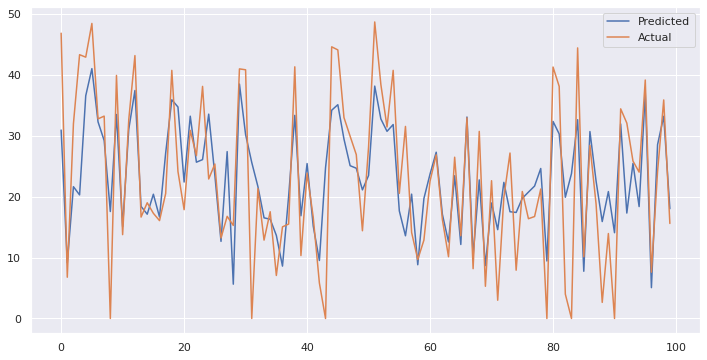

In [ ]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(y_test_pred_en[:100])
plt.plot(np.array(Y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
elastic = ElasticNet()

# define grid search
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, Y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.246e+05, tolerance: 8.433e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.298e+05, tolerance: 8.477e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.246e+05, tolerance: 8.545e+01

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-13, 'l1_ratio': 0.7}

Using  {'alpha': 1e-13, 'l1_ratio': 0.7}  the negative mean squared error is:  -47.289503114225234


In [ ]:
y_pred_en1 = elastic_regressor.predict(X_train)
y_pred_en2 = elastic_regressor.predict(X_test)

In [ ]:
#calculate MSE
MSE_r= mean_squared_error((Y_train), (y_pred_en1))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)

#calculate MAE
MAE_r= mean_absolute_error(Y_train, y_pred_en1)
print("MAE :",MAE_r)

#calculate r2 and adjusted r2
r2_r= r2_score(Y_train, y_pred_en1)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(Y_train, y_pred_en1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(Y_train, y_pred_en1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 47.00974442990058
RMSE : 6.856365249160854
MAE : 5.307121592344672
R2 : 0.6893205969484972
Adjusted R2 : 0.6869967579153157


Here we are getting r2 score value as 0.68 for train data after cross validation.

In [ ]:
#calculate MSE
MSE_l= mean_squared_error(Y_test, y_pred_en2)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(Y_test, y_pred_en2)
print("MAE :",MAE_l)

#calculate r2 and adjusted r2
r2_l= r2_score((Y_test), (y_pred_en2))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((Y_test), (y_pred_en2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((Y_test), (y_pred_en2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 49.01542648422867
RMSE : 7.00110180501817
MAE : 5.4199925004312774
R2 : 0.6808373635811509
Adjusted R2 : 0.6784500711338293


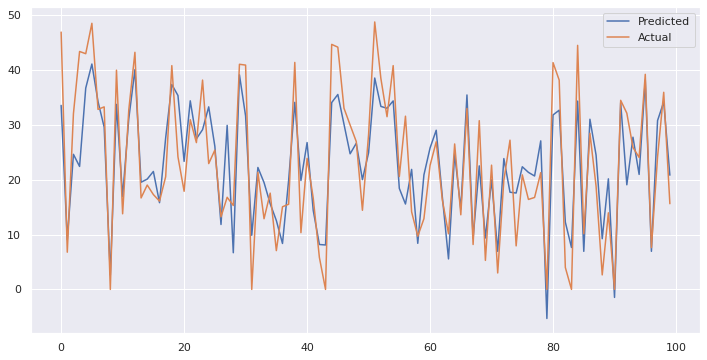

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_pred_en2[:100])
plt.plot(np.array(Y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV.it used to find the optimal hyperparameters of a model which results in the most 'accurate' predictions.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is improvement after doing hyperparameter tuning and cross validation. r2 score for training and testing set wah 0.59 respectively but after hyperparameter tuning it is increased and now it's 0.68 and 0.68 for train and test data resp.



### ML Model - 4 DecisionTree Regressor

In [ ]:
#ML Model - 3
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)

dt_reg.fit(X_train, Y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
# Predict on the model
y_pred_train_dt = dt_reg.predict(X_train)
y_pred_test_dt = dt_reg.predict(X_test)

In [ ]:
#calculate MSE
MSE_d= mean_squared_error(Y_train, y_pred_train_dt)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)

#calculate MAE
MAE_d= mean_absolute_error(Y_train, y_pred_train_dt)
print("MAE :",MAE_d)

#calculate r2 and adjusted r2
r2_d= r2_score(Y_train, y_pred_train_dt)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(Y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(Y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 20.722756405037824
RMSE : 4.5522254343384425
MAE : 3.249688314581185
R2 : 0.8630468285336204
Adjusted R2 : 0.8620224377228822


Looks like our r2 score value is 0.86 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#calculate MSE
MSE_d= mean_squared_error(Y_test, y_pred_test_dt)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(Y_test, y_pred_test_dt)
print("MAE :",MAE_d)

#calculate r2 and adjusted r2
r2_d= r2_score((Y_test), (y_pred_test_dt))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((Y_test), (y_pred_test_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((Y_test), (y_pred_test_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 23.838953184955113
RMSE : 4.882515047079232
MAE : 3.4494342703195513
R2 : 0.8447732949865503
Adjusted R2 : 0.8436122206682679


Looks like our r2 score value is 0.84 for test data  that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

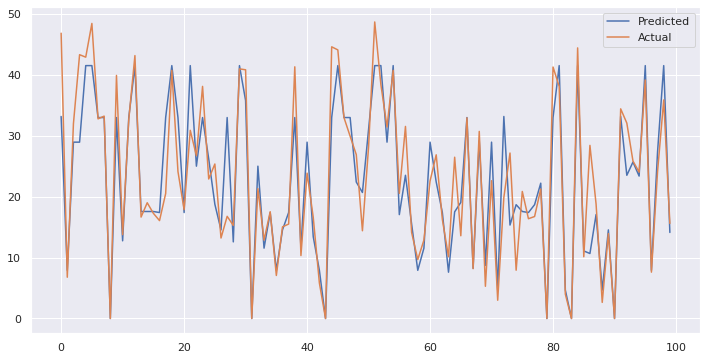

In [ ]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(y_pred_test_dt[:100])
plt.plot(np.array(Y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Hyperparameter grid 
dt_params = {"criterion": ["mse", "mae"],
             "max_depth": [5, 6, 7, 8],
             "min_samples_split": [10, 20, 40],
             "min_samples_leaf": [20, 40, 100],
              }

# create an instance of DecisionTreeRegressor
dt_reg= DecisionTreeRegressor()

# GridSearch
dt_grid= GridSearchCV(estimator = dt_reg, param_grid = dt_params, cv = 5, verbose = 2)

dt_grid.fit(X_train, Y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_sample

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: 

[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=40, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=40, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=40, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=40, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=40, min_samples_split=10; total time=   0.0s
[CV] END c

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: 

[CV] END criterion=mse, max_depth=5, min_samples_leaf=40, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=40, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=40, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=40, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=40, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=40, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=40, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=40, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=40, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=100, min_samples_split=10; total time=   0.0s
[CV] END 

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: 

[CV] END criterion=mse, max_depth=5, min_samples_leaf=100, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=100, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=100, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=100, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=100, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=100, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=100, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=100, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=100, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=100, min_samples_split=40; total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: 

[CV] END criterion=mse, max_depth=6, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END c

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: 

[CV] END criterion=mse, max_depth=6, min_samples_leaf=20, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=20, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=20, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=20, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=40, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=40, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=40, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=40, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=40, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=40, min_samples_split=20; total time=   0.0s
[CV] END c

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: 

[CV] END criterion=mse, max_depth=6, min_samples_leaf=40, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=40, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=40, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=40, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=40, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=40, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=40, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=40, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=100, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=100, min_samples_split=10; total time=   0.0s
[CV] END

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: 

[CV] END criterion=mse, max_depth=6, min_samples_leaf=100, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=100, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=100, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=100, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=100, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=100, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=100, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=100, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=100, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=6, min_samples_leaf=100, min_samples_split=40; total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: 

[CV] END criterion=mse, max_depth=6, min_samples_leaf=100, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=20, min_samples_split=20; total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: 

[CV] END criterion=mse, max_depth=7, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=20, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=20, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=20, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=20, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=20, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=40, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=40, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=40, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=40, min_samples_split=10; total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: 

[CV] END criterion=mse, max_depth=7, min_samples_leaf=40, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=40, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=40, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=40, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=40, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=40, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=40, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=40, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=40, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=40, min_samples_split=40; total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: 

[CV] END criterion=mse, max_depth=7, min_samples_leaf=40, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=100, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=100, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=100, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=100, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=100, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=100, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=100, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=100, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=100, min_samples_split=20; total time=   0.0s
[

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: 

[CV] END criterion=mse, max_depth=7, min_samples_leaf=100, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=100, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=100, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=100, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=100, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=20, min_samples_split=10; total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: 

[CV] END criterion=mse, max_depth=8, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=20, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=20, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=20, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=20, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=20, min_samples_split=40; total time=   0.0s
[CV] END c

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: 

[CV] END criterion=mse, max_depth=8, min_samples_leaf=40, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=40, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=40, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=40, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=40, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=40, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=100, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=100, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=100, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=100, min_samples_split=10; total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: 

[CV] END criterion=mse, max_depth=8, min_samples_leaf=100, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=100, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=100, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=100, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=100, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=100, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=100, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=100, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=100, min_samples_split=40; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=100, min_samples_split=40; total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: 

[CV] END criterion=mae, max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   1.6s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=20, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=20, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=20, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=20, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=20, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=20, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=20, min_samples_split=40; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=20, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=20, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=20, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=40, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=40, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=40, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=40, min_samples_split=10; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=40, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=40, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=40, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=40, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=40, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=40, min_samples_split=20; total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=40, min_samples_split=40; total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=40, min_samples_split=40; total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=40, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=40, min_samples_split=40; total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=40, min_samples_split=40; total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=100, min_samples_split=10; total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=100, min_samples_split=10; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=100, min_samples_split=10; total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=100, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=100, min_samples_split=10; total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=100, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=100, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=100, min_samples_split=20; total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=100, min_samples_split=20; total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=100, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=100, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=100, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=100, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=100, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=5, min_samples_leaf=100, min_samples_split=40; total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=20, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=20, min_samples_split=10; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=20, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=20, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=20, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=20, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=20, min_samples_split=20; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=20, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=20, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=20, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=20, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=20, min_samples_split=40; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=20, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=20, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=20, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=40, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=40, min_samples_split=10; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=40, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=40, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=40, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=40, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=40, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=40, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=40, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=40, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=40, min_samples_split=40; total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=40, min_samples_split=40; total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=40, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=40, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=40, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=100, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=100, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=100, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=100, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=100, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=100, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=100, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=100, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=100, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=100, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=100, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=100, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=100, min_samples_split=40; total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=100, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=6, min_samples_leaf=100, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=20, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=20, min_samples_split=10; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=20, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=20, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=20, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=20, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=20, min_samples_split=20; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=20, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=20, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=20, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=20, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=20, min_samples_split=40; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=20, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=20, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=20, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=40, min_samples_split=10; total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=40, min_samples_split=10; total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=40, min_samples_split=10; total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=40, min_samples_split=10; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=40, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=40, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=40, min_samples_split=20; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=40, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=40, min_samples_split=20; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=40, min_samples_split=20; total time=   2.5s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=40, min_samples_split=40; total time=   2.6s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=40, min_samples_split=40; total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=40, min_samples_split=40; total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=40, min_samples_split=40; total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=40, min_samples_split=40; total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=100, min_samples_split=10; total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=100, min_samples_split=10; total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=100, min_samples_split=10; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=100, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=100, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=100, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=100, min_samples_split=20; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=100, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=100, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=100, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=100, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=100, min_samples_split=40; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=100, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=100, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=7, min_samples_leaf=100, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=20, min_samples_split=10; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=20, min_samples_split=10; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=20, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=20, min_samples_split=10; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=20, min_samples_split=10; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=20, min_samples_split=20; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=20, min_samples_split=20; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=20, min_samples_split=20; total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=20, min_samples_split=20; total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=20, min_samples_split=20; total time=   2.5s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=20, min_samples_split=40; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=20, min_samples_split=40; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=20, min_samples_split=40; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=20, min_samples_split=40; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=20, min_samples_split=40; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=40, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=40, min_samples_split=10; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=40, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=40, min_samples_split=10; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=40, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=40, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=40, min_samples_split=20; total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=40, min_samples_split=20; total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=40, min_samples_split=20; total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=40, min_samples_split=20; total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=40, min_samples_split=40; total time=   1.6s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=40, min_samples_split=40; total time=   1.9s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=40, min_samples_split=40; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=40, min_samples_split=40; total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=40, min_samples_split=40; total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=100, min_samples_split=10; total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=100, min_samples_split=10; total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=100, min_samples_split=10; total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=100, min_samples_split=10; total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=100, min_samples_split=10; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=100, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=100, min_samples_split=20; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=100, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=100, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=100, min_samples_split=20; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=100, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=100, min_samples_split=40; total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=100, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=100, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


[CV] END criterion=mae, max_depth=8, min_samples_leaf=100, min_samples_split=40; total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]},
             verbose=2)

In [ ]:
print("\nUsing ",dt_grid.best_params_, "\n the negative mean squared error is: ", dt_grid.best_score_)


Using  {'criterion': 'mse', 'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 10} 
 the negative mean squared error is:  0.8334993451785507


In [ ]:
# predictions on train and test data
y_pred_dt1 = dt_grid.predict(X_train)
y_pred_dt2 = dt_grid.predict(X_test)

In [ ]:
#Train data 
#calculate MSE
MSE_l= mean_squared_error((Y_train), (y_pred_dt1))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)
#calculate MAE
MAE_l= mean_absolute_error(Y_train, y_pred_dt1)
print("MAE :",MAE_l)

#calculate r2 and adjusted r2
r2_l= r2_score(Y_train, y_pred_dt1)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(Y_train, y_pred_dt1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(Y_train, y_pred_dt1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 20.956478051255253
RMSE : 4.577824598131219
MAE : 3.198442785102499
R2 : 0.8615022019374192
Adjusted R2 : 0.8604662575330386


In [ ]:
# Test data 
#calculate MSE
MSE_l= mean_squared_error(Y_test, y_pred_dt2)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(Y_test, y_pred_dt2)
print("MAE :",MAE_l)

#calculate r2 and adjusted r2
r2_l= r2_score((Y_test), (y_pred_dt2))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((Y_test), (y_pred_dt2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((Y_test), (y_pred_dt2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 22.960622685592128
RMSE : 4.791724395829974
MAE : 3.3933366926620465
R2 : 0.8504925205025003
Adjusted R2 : 0.8493742252013108


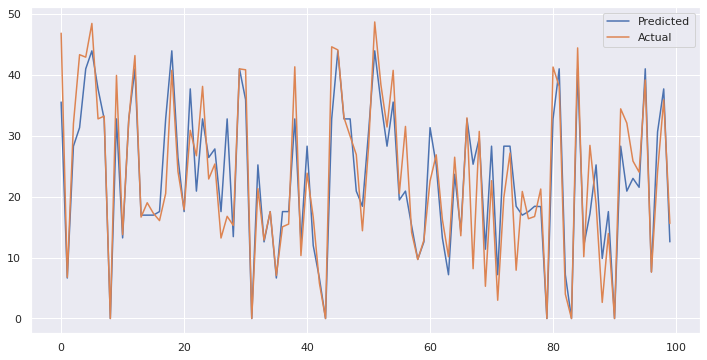

In [ ]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(y_pred_dt2[:100])
plt.plot(np.array(Y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

**Have you seen any improvement? Note down the improvement with updates
**Evaluation metric Score Chart.

There is littel improvement after doing hyperparameter tuning and cross validation.

### ML Model - 5 Random Forest

In [ ]:
# Create an instance of the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,Y_train)


0.9913103762323944 0.9386939905684581


In [ ]:
# Making predictions on train and test data
y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [ ]:
#Let's find out the scores
print(rf_model.score(X_train,Y_train) , rf_model.score(X_test,Y_test))

0.9913103762323944 0.9386939905684581


In [ ]:
#calculate MSE
MSE_rf= mean_squared_error(Y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(Y_train, y_pred_train_r)
print("MAE :",MAE_rf)

#calculate r2 and adjusted r2
r2_rf= r2_score(Y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(Y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(Y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 1.3148505774597796
RMSE : 1.146669340943491
MAE : 0.7386369971154735
R2 : 0.9913103762323944
Adjusted R2 : 0.9912453790465607


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#calculate MSE
MSE_rf= mean_squared_error(Y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(Y_test, y_pred_test_r)
print("MAE :",MAE_rf)

#calculate r2 and adjusted r2
r2_rf= r2_score((Y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((Y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((Y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 9.415075122984241
RMSE : 3.068399439933504
MAE : 1.961181716184592
R2 : 0.9386939905684581
Adjusted R2 : 0.9382354300836422


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

** Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Looks like our r2 score value is 0.99 In train data  and 0.93 in our tesy data  that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# feature importance
rf_model.feature_importances_

array([0.24766761, 0.27606922, 0.0942759 , 0.01135554, 0.0132815 ,
       0.03524348, 0.0667018 , 0.00175718, 0.06195319, 0.00466041,
       0.1648681 , 0.0006073 , 0.02155877])

**2. Cross- Validation & Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_forest = RandomForestRegressor()
params = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 
          'max_features': ['auto', 'sqrt'], 
          'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [2, 5, 10],
          'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
rf_regressor = RandomizedSearchCV(random_forest,params , scoring = 'neg_mean_squared_error' , cv = 5)
rf_regressor.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='neg_mean_squared_error')

In [ ]:
print("\nUsing ",rf_regressor.best_params_, "\n the negative mean squared error is: ", rf_regressor.best_score_)


Using  {'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 40} 
 the negative mean squared error is:  -10.042293316280869


In [ ]:
y_pred_train_r1 = rf_regressor.predict(X_train)
y_pred_test_r2 = rf_regressor.predict(X_test)

In [ ]:
#TRAIN DATA
#calculate MSE
MSE_rf= mean_squared_error(Y_train, y_pred_train_r1)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(Y_train, y_pred_train_r1)
print("MAE :",MAE_rf)

#calculate r2 and adjusted r2
r2_rf= r2_score(Y_train, y_pred_train_r1)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(Y_train, y_pred_train_r1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(Y_train, y_pred_train_r1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2.543517016138249
RMSE : 1.5948407494600358
MAE : 0.9999226846092376
R2 : 0.9831903287752709
Adjusted R2 : 0.9830645947557534


our r2 score value is 0.97 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
#TEST DATA
#calculate MSE
MSE_rf= mean_squared_error(Y_test, y_pred_test_r2)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(Y_test, y_pred_test_r2)
print("MAE :",MAE_rf)

#calculate r2 and adjusted r2
r2_rf= r2_score((Y_test), (y_pred_test_r2))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((Y_test), (y_pred_test_r2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((Y_test), (y_pred_test_r2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 9.570778879956832
RMSE : 3.0936675451568534
MAE : 1.9786027270457802
R2 : 0.9376801297262662
Adjusted R2 : 0.9372139857023545


The r2_score for the test set is 0.93. This means our linear model is performing well on the data

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

There is no improvement after doing hyperparameter tuning and cross validation.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
rf_model.feature_importances_

array([0.24766761, 0.27606922, 0.0942759 , 0.01135554, 0.0132815 ,
       0.03524348, 0.0667018 , 0.00175718, 0.06195319, 0.00466041,
       0.1648681 , 0.0006073 , 0.02155877])

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,Temperature(°C),0.28
0,Hour,0.25
10,Functioning Day,0.16
2,Humidity(%),0.09
6,Rainfall(mm),0.07
8,Seasons,0.06
5,Solar Radiation (MJ/m2),0.04
12,weekend,0.02
3,Wind speed (m/s),0.01
4,Visibility (10m),0.01


In [ ]:
#FIT THE MODEL
rf_model.fit(X_train,Y_train)
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

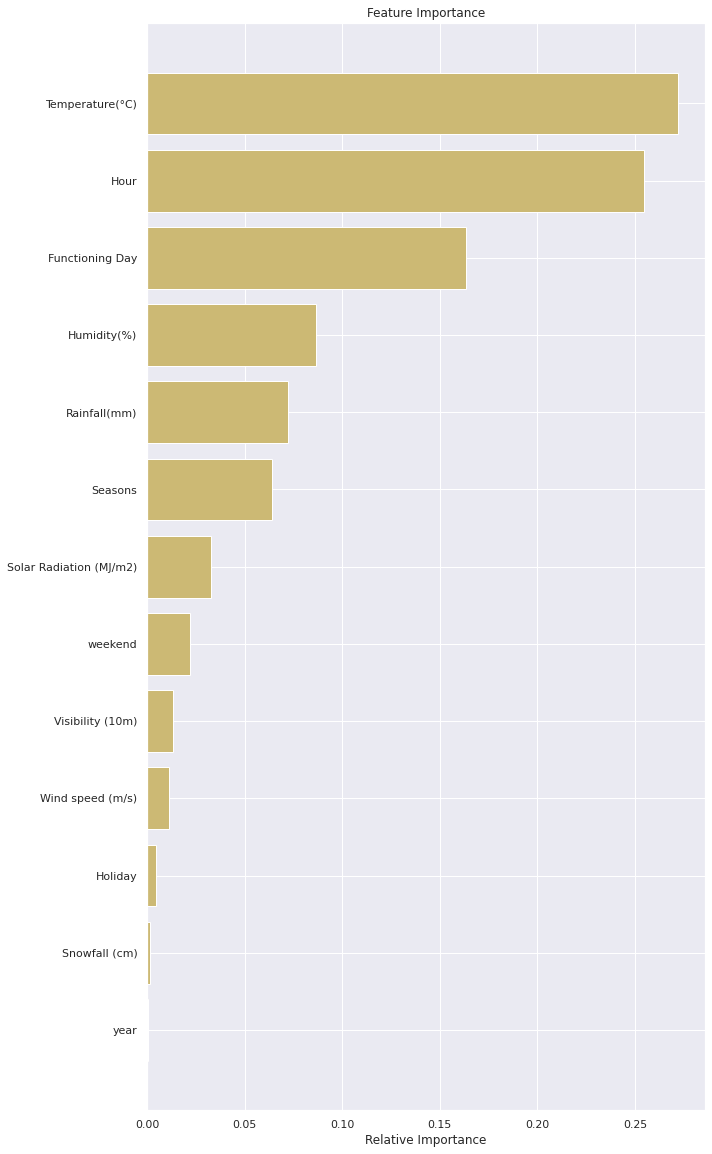

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()


A high level of temperature and hour has positive impact on the count of rental bikes. So, we can say that temperature and hour are most influential features for predicting bike count.

# **Conclusion**

During the time of our analysis, we initially performed EDA on all of the features of dataset. We have analysed both numerical as well as categorical variables. For a good analysis we splitted the date column and added a new column as weekday_weekends. We also saw about the correlation and other relationships and found out that dew_point_temprature and temprature column are colinear and so we dropped the dew_point_temprature column. Also our output feature had some outliers value so we tried to fixed it by square rooting the values of output feature values.

Next we implemented 6 machine learning algorithms Linear Regression,lasso,ridge,elasticnet,decission tree and Random Forest We did hyperparameter tuning to improve our model performance. The results of our evaluation are:

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  R2_score  \
Training set 0           Linear regression   5.307  47.010  6.856     0.689   
             1            Lasso regression   5.382  47.984  6.927     0.683   
             2      Elastic net regression   5.915  59.910  7.740     0.604   
             3    Dicision tree regression   3.250  20.723  4.552     0.863   
             4    Random forest regression   0.739   1.315  1.147     0.991   
Test set     0           Linear regression   5.420  49.015  7.001     0.681   
             1            Lasso regression   5.524  50.501  7.106     0.671   
             2  Elastic net regression Test  6.005  61.930  7.870     0.597   
             3    Dicision tree regression   3.449  23.839  4.883     0.845   
             4    Random forest regression   1.979   9.571  3.094     0.938   

                Adjusted R2  
Training set 0         0.69  
             1         0.68  
             2         0.60  
             3         0.86  
             4         0.99  
Test set     0         0.68  
             1         0.67  
             2         0.59  
             3         0.84  
             4         0.94


1.   No overfitting is seen.
2.   Random forest Regressor gridsearchcv gives the highest R2 score of 99% for Train Set and 94% for Test set.
We can deploy this model.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***